In [1]:
from crop_dl.seeds.rice_counting import RiceSeedsCounting
from crop_dl.models.dl_initilizer import DLInstanceModel
from crop_dl.models.utils import check_weigth_path, downloadzip

import matplotlib.pyplot as plt
import torch
import os

c:\Users\aguilar\miniconda3\envs\datagen_torch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Configuration


In [2]:
IMAGESPATH = "images_example/seeds"
WEIGHTSURL= "https://dlmodels-bucket.s3.ap-northeast-1.amazonaws.com/maskrcnn_rice_seeds.zip"

WEIGHTSPATH = check_weigth_path(WEIGHTSURL, suffix="checkpoint", weights_path="model_weights")


['maskrcnn_rice_seeds_20230308-000041/checkpoint']


### Setting the model and datasets

In [3]:
seed_model = DLInstanceModel(WEIGHTSPATH)

ricecounts = RiceSeedsCounting(
                 IMAGESPATH,
                 seed_model.model, 
                 imagessuffix = ".jpg")

print("files available in folder: ",ricecounts.listfiles)

weights loaded
files available in folder:  ['test.jpg', 'test10.jpg', 'test2.jpg', 'test3.jpg', 'test4.jpg', 'test5.jpg', 'test6.jpg', 'test7.jpg', 'test8.jpg', 'test9.jpg']


### Detecting the rice seeds for an specific image

c:\Users\aguilar\miniconda3\envs\datagen_torch\lib\site-packages\torch\functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ..\aten\src\ATen\native\TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


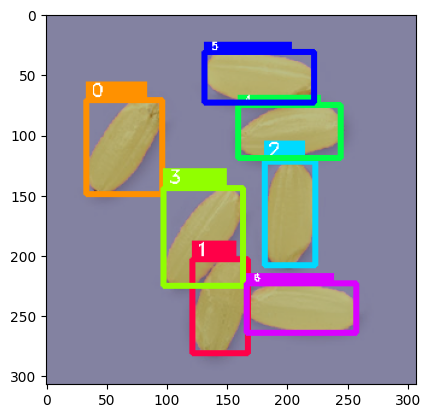

In [4]:
img_number = 3
ricecounts.detect_rice(img_number, keepsize=True, segment_threshold = 170)
m = ricecounts.plot_prediction(only_image=True)
plt.imshow(m[:,:,[2,1,0]])

#### Extracting information for a single seed

{'fn': ['test3.jpg'], 'seed_id': [6], 'height': [89.0], 'width': [40.0], 'area': [3122.0]}


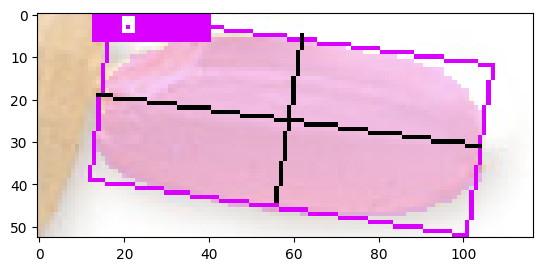

In [5]:
seed_number = 6
m = ricecounts.plot_individual_seed(seed_number)
print(ricecounts.calculate_oneseed_metrics(seed_number))
plt.imshow(m[:,:,[2,1,0]])

#### Extracting information for all seeds

In [7]:
ricecounts.one_image_seeds_summary()

,fn,seed_id,height,width,area
0,test3.jpg,0,89.358827,38.587563,3023.0
0,test3.jpg,1,81.908486,39.560081,2788.0
0,test3.jpg,2,84.000000,41.000000,3038.0
0,test3.jpg,3,91.787799,39.824616,3190.0
0,test3.jpg,4,83.000000,43.000000,3036.0
0,test3.jpg,5,90.000000,40.000000,3211.0
0,test3.jpg,6,89.000000,40.000000,3122.0


#### Extracting the data for all the files that are inside the folder

In [8]:
ricecounts.all_image_seeds_summary()

,fn,seed_id,height,width,area
0,test.jpg,0,28.653098,27.294688,2829.0
0,test10.jpg,0,38.418745,21.260292,752.0
0,test10.jpg,1,34.928498,17.720045,589.0
0,test10.jpg,2,34.409301,18.601075,581.0
0,test10.jpg,3,34.655447,17.691806,585.0
...,...,...,...,...,...
0,test9.jpg,0,33.286634,18.601075,570.0
0,test9.jpg,1,36.000000,30.000000,988.0
0,test9.jpg,2,32.202484,17.000000,522.0
0,test9.jpg,3,29.000000,28.000000,814.0


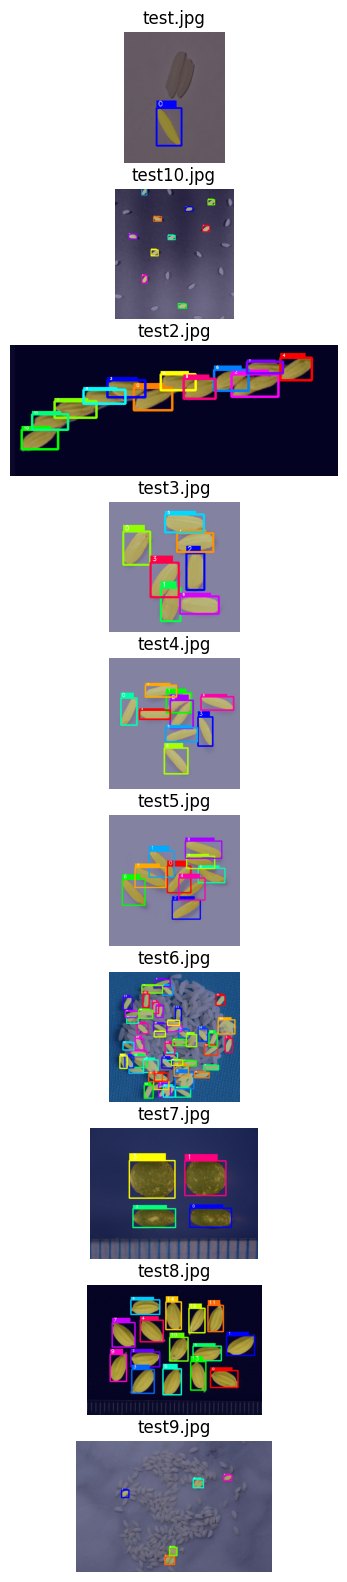

In [14]:
images = ricecounts.all_image_predictions()

f, ax = plt.subplots(nrows=len(images), ncols=1, figsize = (10,20))

for i in range(len(images)):
    ax[i].imshow(images[i])
    ax[i].set_axis_off()
    ax[i].set_title(ricecounts.listfiles[i])